## 1. Pie Chart

In [1]:
## Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Import Data Tips
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_by_day = tips[['tip','day']].groupby(['day'], as_index=False).mean()
tips_by_day.head()

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


### 1.1 Matplotlib

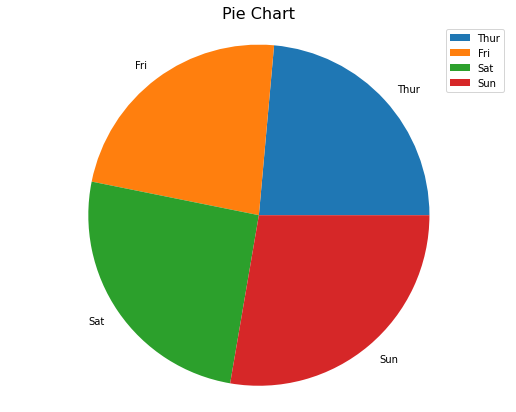

In [23]:
plt.figure(figsize=(9,7))
plt.pie(tips_by_day['tip'], labels=tips_by_day['day'])
plt.axis('equal')
plt.title('Pie Chart', size=16)
plt.legend()

plt.show()

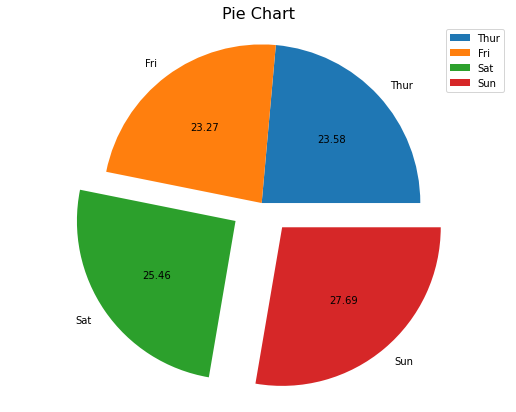

In [31]:
plt.figure(figsize=(9,7))
plt.pie(tips_by_day['tip'], 
        labels=tips_by_day['day'],
        autopct = '%.2f',            # Plot percentage 2 angka dibelakang koma
        explode = (0, 0, 0.2, 0.2))  # Memisahkan Pie
plt.axis('equal')
plt.title('Pie Chart', size=16)
plt.legend()
plt.show()

### 1.2 Pandas

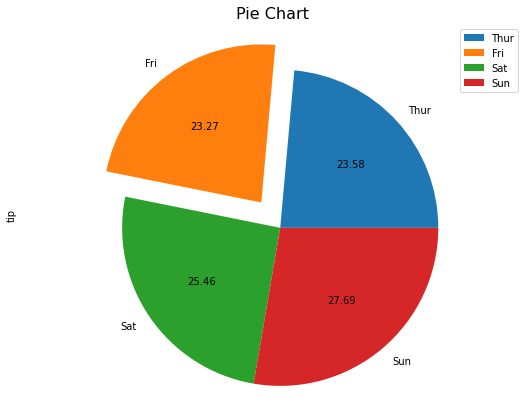

In [39]:
tips_by_day.plot.pie(y='tip',
                     figsize=(9,7),
                     labels=tips_by_day['day'],
                     labeldistance=1.1,
                     autopct='%.2f',
                     explode=(0, 0.2, 0, 0))
plt.axis('equal')
plt.title('Pie Chart', size=16)
plt.legend()
plt.show()

## 2. Heatmap

### 2.1 Matplotlib

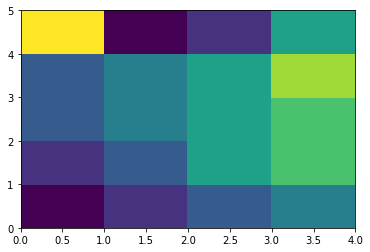

In [48]:
# Create Datase

data = [{2,3,4,1},{6,3,5,2},{6,3,5,4},{3,7,5,4},{2,8,1,5}]
Index = ['T1', 'T2', 'T3', 'T4', 'T5']
Cols = ['C1', 'C2', 'C3', 'C4']
df = pd.DataFrame(data, index=Index, columns=Cols)

# Showing Heat,ap
plt.pcolor(df)
plt.show()

In [46]:
df.head()

,C1,C2,C3,C4
T1,1,2,3,4
T2,2,3,5,6
T3,3,4,5,6
T4,3,4,5,7
T5,8,1,2,5


### 2.2 Seaborn

In [50]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
182,45.35,3.50,Male,Yes,Sun,Dinner,3
134,18.26,3.25,Female,No,Thur,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [51]:
corr_mat = tips[['total_bill', 'tip', 'size']].corr()
corr_mat

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


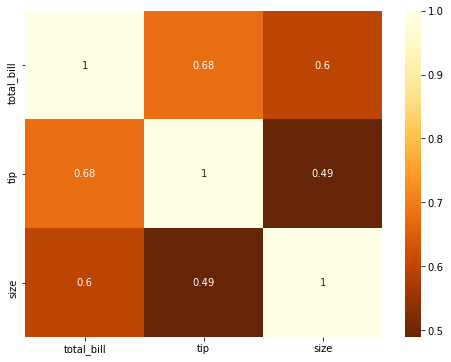

In [56]:
# Using Seaborn
plt.figure(figsize = (8,6))
sns.heatmap(corr_mat,
            annot = True,
            cmap = 'YlOrBr_r')
plt.show()

## 3. Folium

In [57]:
# Install Folium Library
!pip install folium

In [82]:
# Import Libray
import folium

## Define the world map
world_map = folium.Map()

#Show the map
world_map

In [102]:
# Set latitude, longitude
lat = -8.462920
long = 119.873619

# Define the map function
Bajo = folium.Map(location=[lat, long],
                 zoom_start=12,
                 tiles="Stamen Terrain",
                 width = '75%', height = '50%')
folium.Marker([lat, long], 
              popup="<b>Labuan Bajo, Nusa Tenggara Timur</b>", 
              tooltip='Labuan Bajo')
.add_to(Bajo)

folium.CircleMarker([lat, long],
    radius=50,
    popup="Labuan Bajo",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(Bajo)

#show the maps
Bajo

In [100]:
# Set latitude, longitude
lat = -8.462920
long = 119.873619

# Define the map function
Bajo = folium.Map(location=[lat, long],
                 zoom_start=12,
                 tiles="Stamen Toner",
                 width = '75%', height = '50%')
folium.Marker([lat, long], popup="<b>Labuan Bajo, Nusa Tenggara Timur</b>",
              tooltip='Labuan Bajo', icon=folium.Icon(color="red", icon="info-sign")).add_to(Bajo)

#show the maps
Bajo

# Exercise

In [107]:
#Getting Transmigrant Data
link = 'https://data.jakarta.go.id/dataset/311c185a-35ce-41b7-ab70-fa61de40b2dd/resource/75557fa02225547c5541bfb0f7eb7fb8/download/Data-Jumlah-Pelaporan-Kedatangan-Penduduk-dari-Luar-Provinsi-DKI-Jakarta-Per-Kelurahan-Bulan-Oktober-Tahun-2020.csv'
data = pd.read_csv(link)
data.sample(5)

,tahun,bulan,kota_kabupaten,kecamatan,kelurahan,jenis_kelamin,jumlah
398,2020,10,JAKARTA BARAT,KEMBANGAN,KEMBANGAN UTARA,Perempuan,30
512,2020,10,JAKARTA TIMUR,DUREN SAWIT,PONDOK KELAPA,Perempuan,42
387,2020,10,JAKARTA BARAT,KALI DERES,KALIDERES,Perempuan,36
276,2020,10,JAKARTA PUSAT,GAMBIR,PETOJO SELATAN,Perempuan,17
458,2020,10,JAKARTA SELATAN,JAGAKARSA,JAGAKARSA,Perempuan,30


In [123]:
#Getting Coordinat or Geometry
geom = pd.read_csv('jakarta_by_kelurahan_geo.csv')
geom

,the_geom,name,cartodb_id,created_at,updated_at
0,0106000020E61000000100000001030000000100000006...,ANGKE,2,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
1,0106000020E61000000100000001030000000100000007...,PASEBAN,172,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
2,0106000020E61000000100000001030000000100000008...,KRENDANG,137,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
3,0106000020E61000000100000001030000000100000009...,TAMBORA,240,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
4,0106000020E61000000100000001030000000100000018...,DUREN SAWIT,47,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
...,...,...,...,...,...
257,0106000020E6100000010000000103000000010000000B...,UTAN KAYU SELATAN,258,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
258,0106000020E6100000010000000103000000010000000B...,UTAN KAYU UTARA,259,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
259,0106000020E6100000010000000103000000010000000C...,UTAN PANJANG,260,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00
260,0106000020E61000000100000001030000000100000007...,WARAKAS,261,2015-01-10 14:29:58.366572+00,2015-01-10 14:29:58.366572+00


In [126]:
## Reduce Columns
data_kel = data[['kelurahan','jumlah']]
data_kel.sample(5)

,kelurahan,jumlah
125,PALMERAH,26
383,KELAPA DUA,16
239,PULO GEBANG,66
447,SENAYAN,2
25,SENEN,6


In [141]:
## Reduce Columns
geom = geom [['the_geom', 'name']]
geom_new = geom.rename(columns={'name': 'kelurahan'})
geom_new.head(5)

,the_geom,kelurahan
0,0106000020E61000000100000001030000000100000006...,ANGKE
1,0106000020E61000000100000001030000000100000007...,PASEBAN
2,0106000020E61000000100000001030000000100000008...,KRENDANG
3,0106000020E61000000100000001030000000100000009...,TAMBORA
4,0106000020E61000000100000001030000000100000018...,DUREN SAWIT


In [159]:
## Merge data_kel with geom
final_data=data_kel.merge(geom_new, on='kelurahan')
final_data

,kelurahan,jumlah,the_geom
0,GAMBIR,2,0106000020E61000000100000001030000000100000016...
1,GAMBIR,0,0106000020E61000000100000001030000000100000016...
2,CIDENG,3,0106000020E6100000010000000103000000010000000B...
3,CIDENG,3,0106000020E6100000010000000103000000010000000B...
4,PETOJO UTARA,6,0106000020E61000000100000001030000000100000008...
...,...,...,...
499,BAMBU APUS,9,0106000020E61000000100000001030000000100000025...
500,LUBANG BUAYA,24,0106000020E6100000010000000103000000010000001F...
501,LUBANG BUAYA,38,0106000020E6100000010000000103000000010000001F...
502,CEGER,12,0106000020E61000000100000001030000000100000010...


In [157]:
jkt = r'jakarta_by_kelurahan_geo.geojson'

#Set Latitude Longitude
lat = -6.175110
long = 106.865036
jkt_loc = [lat, long]
jkt_map = folium.Map(location = jkt_loc,
                    zoom_start = 11)
# jkt_map

#Add Chlorophlet
folium.Choropleth(geo_data = jkt,
                  data = data_kel,
                  columns = ['kelurahan', 'jumlah'],
                  key_on = 'feature.properties.name',     #Join data kelurahan jumlah dengan data kelurahan peta
                  color = 'jumlah',
                  fill_color = 'YlGnBu',
                  fill_opacity = 0.4,
                  line_opacity = 0.1,
                  legend_name = 'Transmigrant Rate in Jakarta').add_to(jkt_map)

jkt_map

In [161]:
jkt = r'jakarta_by_kelurahan_geo.geojson'

#Set Latitude Longitude
lat = -6.175110
long = 106.865036
jkt_loc = [lat, long]
jkt_map = folium.Map(location = jkt_loc,
                    zoom_start = 11)
# jkt_map

# Fill Data Kelurahan with geometry

 
#Add Chlorophlet
folium.Choropleth(geo_data = final_data,
                  data = final_data,
                  columns = ['kelurahan', 'jumlah'],
                  key_on = 'feature.properties.kelurahan',     #Join data kelurahan jumlah dengan data kelurahan peta
                  color = 'jumlah',
                  fill_color = 'YlGnBu',
                  fill_opacity = 0.4,
                  line_opacity = 0.1,
                  legend_name = 'Transmigrant Rate in Jakarta').add_to(jkt_map)

NIL = folium.features.GeoJson(
    final_data, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['kelurahan','jumlah'],
        aliases=['Kelurahan: ','Jumlah: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
jkt_map.add_child(NIL)
jkt_map.keep_in_front(NIL)
folium.LayerControl().add_to(jkt_map)
jkt_map

ValueError: Cannot render objects with any missing geometries:         kelurahan  jumlah                                           the_geom
0          GAMBIR       2  0106000020E61000000100000001030000000100000016...
1          GAMBIR       0  0106000020E61000000100000001030000000100000016...
2          CIDENG       3  0106000020E6100000010000000103000000010000000B...
3          CIDENG       3  0106000020E6100000010000000103000000010000000B...
4    PETOJO UTARA       6  0106000020E61000000100000001030000000100000008...
..            ...     ...                                                ...
499    BAMBU APUS       9  0106000020E61000000100000001030000000100000025...
500  LUBANG BUAYA      24  0106000020E6100000010000000103000000010000001F...
501  LUBANG BUAYA      38  0106000020E6100000010000000103000000010000001F...
502         CEGER      12  0106000020E61000000100000001030000000100000010...
503         CEGER      14  0106000020E61000000100000001030000000100000010...

[504 rows x 3 columns]